In [295]:
import pandas as pd

In [296]:
colnames=['Industrial Risk',
'Management Risk',
'Financial Flexibility',
'Credibility',
'Competitiveness',
'Operating Risk',
'Class']

df = pd.read_csv('Qualitative_Bankruptcy.data.txt', names=colnames)

In [297]:
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [298]:
df.shape

(250, 7)

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [300]:
df.Class.value_counts()

NB    143
B     107
Name: Class, dtype: int64

In [301]:
df['Class_num'] = 0

In [302]:
for ind in df.index:
    if df.Class[ind] == 'NB':
        df.Class_num[ind] = 1
    else:
        df.Class_num[ind] = 0

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [303]:
df.Class_num.value_counts()

1    143
0    107
Name: Class_num, dtype: int64

In [220]:
df.dtypes

Industrial Risk          object
Management Risk          object
Financial Flexibility    object
Credibility              object
Competitiveness          object
Operating Risk           object
Class                    object
Class_num                 int64
dtype: object

In [221]:
df.describe()

,Class_num
count,250.000000
mean,0.572000
std,0.495781
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [222]:
df.isnull().sum()

Industrial Risk          0
Management Risk          0
Financial Flexibility    0
Credibility              0
Competitiveness          0
Operating Risk           0
Class                    0
Class_num                0
dtype: int64

In [38]:
print(df[df['Management Risk'] == 'A'].count())
print(df[df['Industrial Risk'] == 'A'].count())
print(df[df['Financial Flexibility'] == 'A'].count())
print(df[df['Credibility'] == 'A'].count())
print(df[df['Competitiveness'] == 'A'].count())
print(df[df['Operating Risk'] == 'A'].count())

Industrial Risk          69
Management Risk          69
Financial Flexibility    69
Credibility              69
Competitiveness          69
Operating Risk           69
Class                    69
dtype: int64
Industrial Risk          81
Management Risk          81
Financial Flexibility    81
Credibility              81
Competitiveness          81
Operating Risk           81
Class                    81
dtype: int64
Industrial Risk          74
Management Risk          74
Financial Flexibility    74
Credibility              74
Competitiveness          74
Operating Risk           74
Class                    74
dtype: int64
Industrial Risk          77
Management Risk          77
Financial Flexibility    77
Credibility              77
Competitiveness          77
Operating Risk           77
Class                    77
dtype: int64
Industrial Risk          56
Management Risk          56
Financial Flexibility    56
Credibility              56
Competitiveness          56
Operating Risk          

# EDA
1. There are 7 columns in the dataset with 6 independent features and one dependent/target column. All columns have categorical data and are ordinal columns.
2. There are no NULL or empty data in the dataset
3. 'Class' is the target column having two possible values B-Bankruptcy,NB-Non-Bankruptcy
4. There are 250 records in the dataset.
5. Each of the 6 independent features have one of the 3 possible values  
P=Positive,A-Average,N-negative
6. - Competitiveness has the highest 'P' positive count of 91 while Financial Flexibility has the lowest with 57
   - Management Risk and Financial Flexibility have the highest 'N' negative count of 119 while Industrial Risk is the least with 89 entries.
   - Industrial Risk has the highest 'A' average count of 81 while Competitiveness has the least with 56 entries.
From this data we can infer that Financial flexibility is the biggest negative driver while competitivenss is the most positive driving factor.

In [304]:
#Encode independent features
df_ind = df.loc[:,'Industrial Risk':'Operating Risk']
df_ind.head()
df_ind.shape

(250, 6)

In [305]:
#ONEHOT ENCODING
df_enc = df_ind.copy()
print('Dimension of the dataframe before encoding: ', df_enc.shape)
df_enc = pd.get_dummies(df_enc, columns=['Industrial Risk',
'Management Risk',
'Financial Flexibility',
'Credibility',
'Competitiveness',
'Operating Risk'])
#mergedata = mergedata.drop(['sex','region','smoker'],axis=1)
print('Dimension of the dataframe after encoding: ',df_enc.shape)

Dimension of the dataframe before encoding:  (250, 6)
Dimension of the dataframe after encoding:  (250, 18)


In [306]:
df_enc.head()

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


In [307]:
df_enc.dtypes

Industrial Risk_A          uint8
Industrial Risk_N          uint8
Industrial Risk_P          uint8
Management Risk_A          uint8
Management Risk_N          uint8
Management Risk_P          uint8
Financial Flexibility_A    uint8
Financial Flexibility_N    uint8
Financial Flexibility_P    uint8
Credibility_A              uint8
Credibility_N              uint8
Credibility_P              uint8
Competitiveness_A          uint8
Competitiveness_N          uint8
Competitiveness_P          uint8
Operating Risk_A           uint8
Operating Risk_N           uint8
Operating Risk_P           uint8
dtype: object

Separate the dependant variable from the rest of the train data

In [308]:
y = df["Class_num"]

In [310]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [311]:
df_enc.corr()

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P
Industrial Risk_A,1.000000,-0.514732,-0.474919,0.279995,-0.283335,0.037841,0.037896,0.024712,-0.070651,0.000963,-0.096273,0.099348,0.079049,-0.093285,0.026930,0.214560,-0.187668,0.007427
Industrial Risk_N,-0.514732,1.000000,-0.510038,-0.309552,0.395364,-0.136804,-0.079497,0.127729,-0.065550,-0.007455,0.060984,-0.056135,-0.118941,0.277201,-0.180501,-0.045638,0.174707,-0.145979
Industrial Risk_P,-0.474919,-0.510038,1.000000,0.036831,-0.121561,0.102458,0.043580,-0.155900,0.138166,0.006687,0.033990,-0.042053,0.042780,-0.190943,0.158257,-0.168415,0.008953,0.142389
Management Risk_A,0.279995,-0.309552,0.036831,1.000000,-0.588468,-0.354570,0.050495,-0.086790,0.048373,-0.043649,0.019508,0.023019,-0.095637,-0.098682,0.183819,0.176344,-0.116133,-0.034722
Management Risk_N,-0.283335,0.395364,-0.121561,-0.588468,1.000000,-0.547337,-0.179382,0.278337,-0.136153,-0.080705,0.252258,-0.182679,-0.089444,0.324994,-0.254951,0.035661,0.156563,-0.199907
Management Risk_P,0.037841,-0.136804,0.102458,-0.354570,-0.547337,1.000000,0.155182,-0.232051,0.107385,0.138515,-0.311922,0.187435,0.202434,-0.273698,0.104570,-0.223777,-0.060849,0.267127
Financial Flexibility_A,0.037896,-0.079497,0.043580,0.050495,-0.179382,0.155182,1.000000,-0.618013,-0.352386,0.174769,-0.394799,0.237781,0.324168,-0.471563,0.201493,-0.059984,-0.101056,0.162391
Financial Flexibility_N,0.024712,0.127729,-0.155900,-0.086790,0.278337,-0.232051,-0.618013,1.000000,-0.517960,-0.306236,0.649099,-0.372180,-0.358389,0.796896,-0.504642,0.073842,0.108321,-0.182679
Financial Flexibility_P,-0.070651,-0.065550,0.138166,0.048373,-0.136153,0.107385,-0.352386,-0.517960,1.000000,0.174383,-0.343119,0.184321,0.073910,-0.435532,0.381488,-0.022634,-0.018990,0.040769
Credibility_A,0.000963,-0.007455,0.006687,-0.043649,-0.080705,0.138515,0.174769,-0.306236,0.174383,1.000000,-0.517874,-0.453459,0.161098,-0.259191,0.125548,0.009169,-0.054136,0.049722


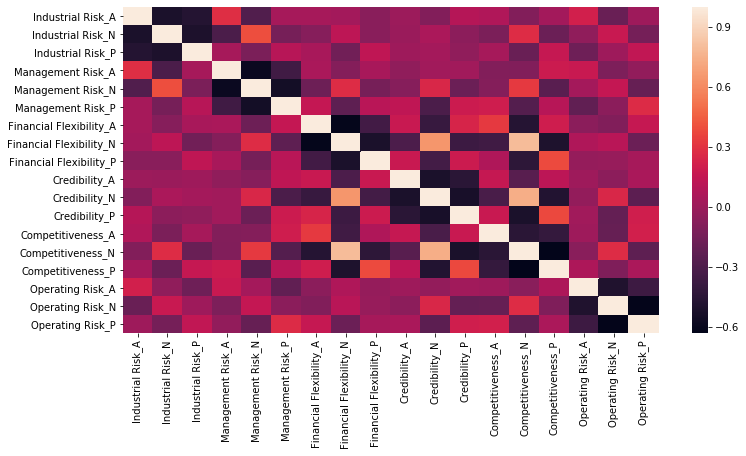

In [312]:
sns.heatmap(df_enc.corr())

Create Train Test split [80:20] ratio

In [313]:
from sklearn import model_selection

test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_enc, y, test_size=test_size, random_state=seed)

In [314]:
X_train.head()

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P
240,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
109,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
46,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0
120,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
247,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [315]:
X_train.sort_index(inplace=True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [316]:
X_train.head()

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
5,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0
6,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1


In [317]:
y_train.sort_index(inplace=True)

In [318]:
y_train.head()

0    1
1    1
4    1
5    1
6    1
Name: Class_num, dtype: int64

Apply PCA on the independent features of train data.

In [319]:
# We transform (centralize) the entire X (independent variable data) using MinMaxScalar. We will create the PCA dimensions
# on the training data. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = MinMaxScaler()
#scaler = StandardScaler()
data_rescaled_train = scaler.fit_transform(X_train)

In [320]:
#Fitting the PCA algorithm with our Data
#pca = PCA().fit(data_rescaled_train)
#Plotting the Cumulative Summation of the Explained Variance

#95% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled_train)
reduced = pca.transform(data_rescaled_train)

#plt.figure()
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('Number of Components')
#plt.ylabel('Variance (%)') #for each component
#plt.title('Pulsar Dataset Explained Variance')
#plt.show()

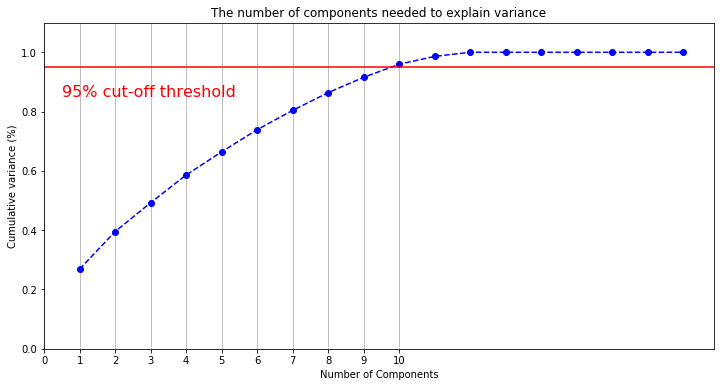

In [321]:
pca = PCA().fit(data_rescaled_train)

#% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 19, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [322]:
#from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(data_rescaled_train)
print(X_pca)

[[-1.22930115  0.13897414  0.07932664 ...  0.21846181  0.12144834
   0.21073028]
 [-0.22047877  1.30024195 -0.36107707 ...  0.25972651  0.37228855
  -0.41080245]
 [-0.46856859  1.18328808 -0.17240068 ... -0.44547837 -0.01451266
  -0.24149611]
 ...
 [ 1.28605256 -0.40065488  0.27976082 ... -0.29690557 -0.58500176
  -0.59500361]
 [ 1.53243901  0.52342227  0.01762632 ...  0.0375517   0.05398094
  -0.06503012]
 [ 0.50583798 -0.39291549 -0.54384808 ... -0.57667185 -0.02887238
   0.53947339]]


In [323]:
pca.explained_variance_ratio_

array([0.26869348, 0.12660059, 0.09735974, 0.0935395 , 0.07823224,
       0.07466707, 0.06523222, 0.05972307, 0.05169791, 0.04404927])

In [324]:
pca.explained_variance_ratio_.sum()

0.9597950762441779

n_components = 10 gives explained variance of 95.9%

In [325]:
cov_matrix = np.cov(data_rescaled_train.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 0.22221106 -0.12768844 -0.09452261  0.05442211 -0.06532663  0.01090452
   0.00256281  0.01175879 -0.01432161 -0.01577889 -0.01713568  0.03291457
   0.01246231 -0.01864322  0.0061809   0.0459799  -0.04201005 -0.00396985]
 [-0.12768844  0.23796482 -0.11027638 -0.05962312  0.09296482 -0.03334171
  -0.01711055  0.02879397 -0.01168342  0.00839196  0.01183417 -0.02022613
  -0.02984925  0.06786432 -0.03801508 -0.01670854  0.0481407  -0.03143216]
 [-0.09452261 -0.11027638  0.20479899  0.00520101 -0.02763819  0.02243719
   0.01454774 -0.04055276  0.02600503  0.00738693  0.00530151 -0.01268844
   0.01738693 -0.04922111  0.03183417 -0.02927136 -0.00613065  0.03540201]
 [ 0.05442211 -0.05962312  0.00520101  0.18590452 -0.12311558 -0.06278894
   0.01012563 -0.02005025  0.00992462 -0.02115578  0.00570352  0.01545226
  -0.01396985 -0.01665829  0.03062814  0.025      -0.02281407 -0.00218593]
 [-0.06532663  0.09296482 -0.02763819 -0.12311558  0.25125628 -0.1281407
  -0.04271357

In [326]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-7.24136369e-02 -4.75185605e-01 -3.04712949e-02 -1.53685471e-01
   2.73163816e-01 -1.18535243e-02  3.33736696e-01 -2.74490595e-01
  -2.19667377e-01  2.84688222e-01 -1.41458667e-01  1.66706212e-02
  -1.32074098e-01 -2.46511919e-04 -2.20555189e-01  4.13001599e-01
   1.83141512e-01 -3.13224844e-01]
 [ 1.73972809e-01  4.48891554e-01  1.43418922e-01 -7.08154218e-02
   1.40440607e-01 -2.73988025e-01 -1.96236793e-01 -1.84308734e-01
   7.73907990e-02 -3.54294473e-01  1.92998600e-01  2.70700445e-01
  -1.32074098e-01 -2.46511919e-04 -2.20555189e-01  4.13001599e-01
   1.83141512e-01 -3.13224844e-01]
 [-1.01559172e-01  2.62940507e-02 -1.12947627e-01  2.24500893e-01
  -4.13604424e-01  2.85841549e-01 -1.37499903e-01  4.58799329e-01
   1.42276578e-01  6.96062515e-02 -5.15399332e-02 -2.87371066e-01
  -1.32074098e-01 -2.46511919e-04 -2.20555189e-01  4.13001599e-01
   1.83141512e-01 -3.13224844e-01]
 [-7.49052703e-02 -3.32736545e-01  5.78451098e-02  1.68350081e-01
   2.07452660e-01  

In [327]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(1.039560218638523, array([-0.07241364,  0.17397281, -0.10155917, -0.07490527,  0.24900239,
       -0.17409712, -0.23105335,  0.41853263, -0.18747928, -0.11479709,
        0.38527666, -0.27047957, -0.15575888,  0.44749917, -0.29174029,
        0.0048563 ,  0.1526673 , -0.1575236 ])), (0.48981067308269205, array([-0.4751856 ,  0.44889155,  0.02629405, -0.33273655,  0.31436189,
        0.01837466,  0.07007483, -0.21303066,  0.14295583,  0.25737263,
       -0.1880548 , -0.06931783, -0.02952295, -0.0778097 ,  0.10733265,
       -0.21379032,  0.32823669, -0.11444638])), (0.37667945867529684, array([-0.01185352, -0.27398802,  0.28584155,  0.2019475 , -0.41771107,
        0.21576357, -0.05798943, -0.01386569,  0.07185512,  0.09851063,
        0.12840236, -0.22691299, -0.22964779,  0.07504012,  0.15460767,
       -0.29344387,  0.52317219, -0.22972832])), (0.3618991473068618, array([ 0.27316382,  0.14044061, -0.41360442,  0.20745266,  0.0561679 ,
       -0.26362056, -0.02782179, -0.07553088,  

In [328]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%

10 Principal Components explains/contain 95% of information, so we go with 10 principal components

In [329]:
# P_reduce represents reduced mathematical space....
P_reduce = np.array(eigvectors_sorted[0:10])   # Reducing from 18 to 10 dimension space

X_std_10D = np.dot(data_rescaled_train,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_10D)  # converting array to dataframe for pairplot

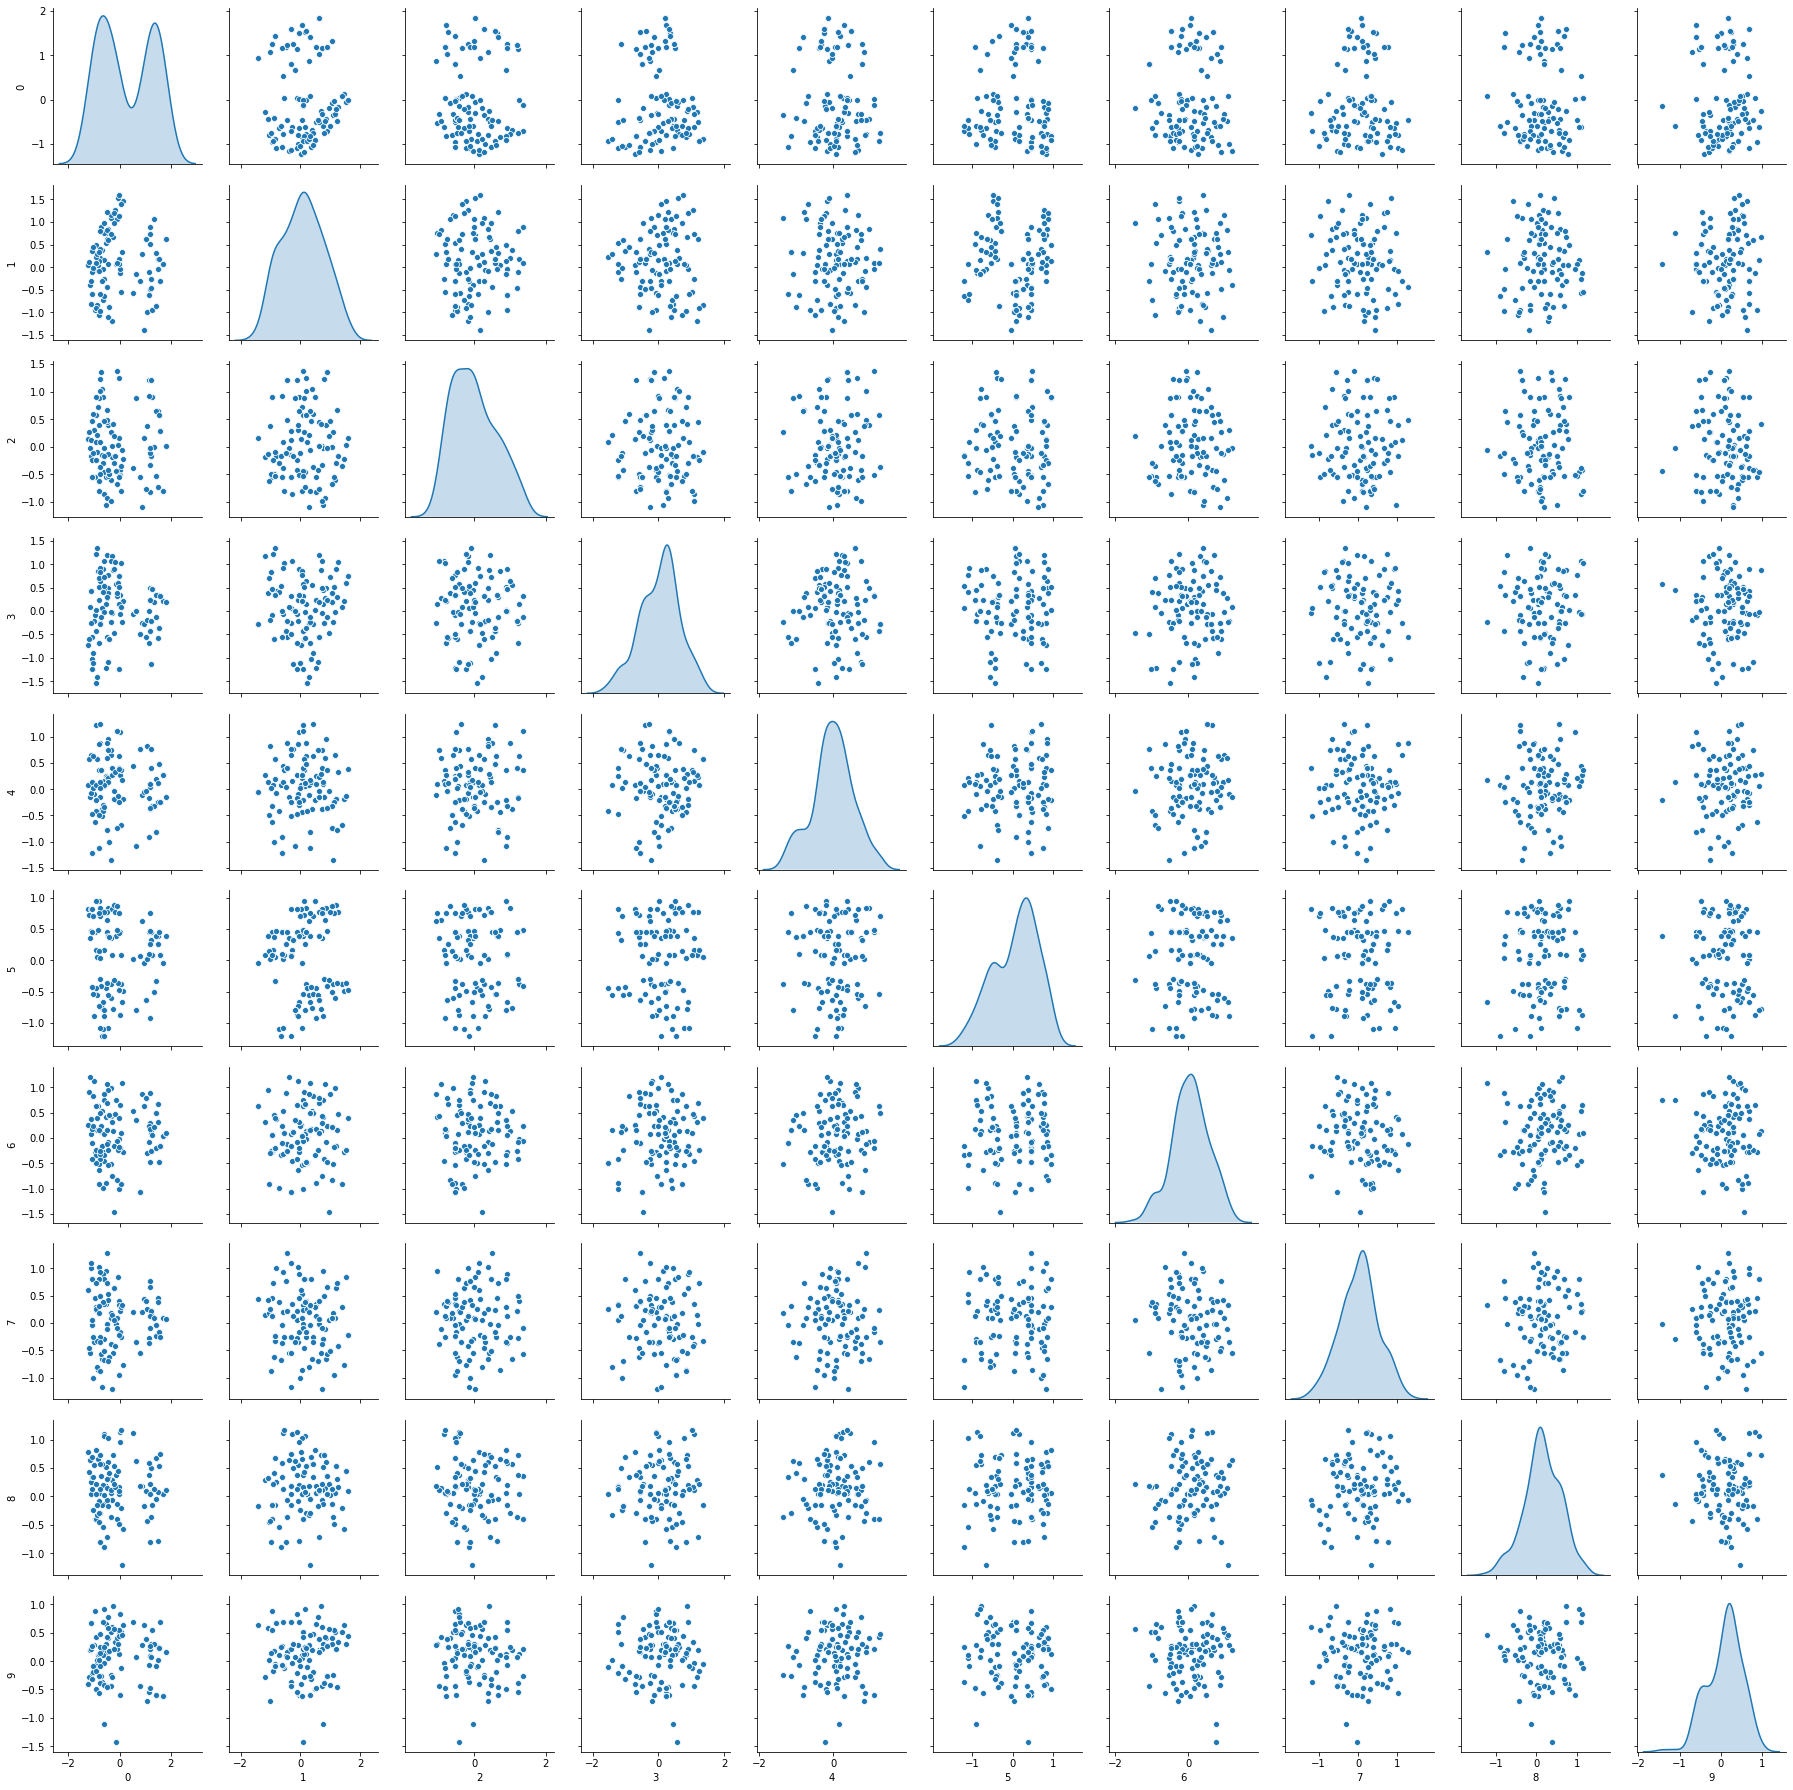

In [330]:
sns.pairplot(Proj_data_df, diag_kind='kde') 

In [331]:
from sklearn.cluster import KMeans

# Let us check optimal number of clusters-
cluster_range = range( 1, 10)   # expect 2 to 6 clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(Proj_data_df)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,738.965425
1,2,553.237344
2,3,496.433563
3,4,457.446119
4,5,418.409202
5,6,390.035529
6,7,369.991144
7,8,346.356434
8,9,335.040920


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

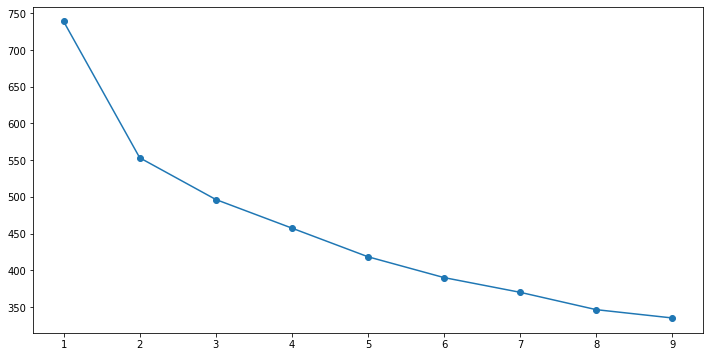

In [333]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [334]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2)

In [335]:
kmeans.fit(Proj_data_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [336]:
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(Proj_data_df) )
centroid_df

,0,1,2,3,4,5,6,7,8,9
0,1.338940,-0.021258,0.037663,-0.032742,-0.028391,0.060957,0.085295,0.049184,0.170057,0.075651
1,-0.577442,0.181367,-0.025161,0.109227,0.005641,0.085828,0.036698,0.022352,0.151217,0.120387


In [380]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [381]:
# Joining the label dataframe with the normalized dataframe
df_labeled = Proj_data_df.join(df_labels)

In [382]:
df_clusters = df_labeled.groupby(['labels'])
df0=df_clusters.get_group(0)
df1=df_clusters.get_group(1)

In [340]:
df0.head()

,0,1,2,3,4,5,6,7,8,9,labels
65,0.531134,-0.569023,-0.390149,-0.072678,0.442546,0.015263,0.526617,0.194735,1.109065,0.689111,0
109,1.432754,-0.853509,-0.533432,0.352216,0.186520,-0.336378,-0.205171,-0.235386,0.677548,-0.081968,0
110,1.551419,0.189997,0.580879,-0.365642,0.489780,0.448372,-0.469070,-0.172426,0.529709,0.223799,0
111,1.403851,0.316608,0.654525,-0.131385,-0.818769,0.389629,0.485522,-0.031343,-0.044470,-0.597191,0
112,0.657391,-0.162042,0.886767,0.010231,-1.077939,-0.792261,0.353157,-0.340807,0.614803,0.068974,0


In [341]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,-0.934789,0.228147,0.082750,-1.540625,-0.421875,-0.436635,-0.490864,0.253022,0.038341,-0.110698,1
1,0.074033,1.389415,-0.357653,0.091583,-0.680458,-0.380490,-0.911318,0.294287,-0.212499,0.510834,1
2,-0.174057,1.272461,-0.168977,1.037124,0.319606,0.770388,0.479015,-0.410918,0.174302,0.341528,1
3,-0.892162,-0.840742,-0.103800,1.352222,0.575204,0.053148,0.401862,-0.325134,-0.144149,-0.054363,1
4,-1.226453,0.038312,0.141582,-0.726259,0.075598,0.824537,0.255075,0.606462,0.785851,-0.407418,1


Create a new column [labels] in the train data [X_train] and populate it with the cluster labels

In [369]:
#X_test.drop(columns='labels_test', inplace=True)

In [388]:
X_train_merge = X_train

In [389]:
X_train_merge.reset_index(inplace=True)

In [393]:
X_train_merge = pd.concat([X_train_merge, df_labels], axis=1)

Transform the test data using the same PCA object that was fit on the train data.

In [344]:
data_rescaled_test = scaler.transform(X_test)

In [345]:
reduced_test = pca.transform(data_rescaled_test)

In [346]:
reduced_test

array([[ 0.88455426,  0.42682269, -0.82888148, -0.18375482, -0.11755744,
         0.99866256, -0.11171353,  0.08950446,  0.1009336 ,  0.57578286],
       [ 0.9621449 , -1.04775332,  0.89941939, -0.42778019,  0.31791771,
        -0.01454149,  0.00681725,  0.09637581,  0.30518924, -0.44614234],
       [-0.412252  , -0.00514482,  1.36240282, -0.28446513, -1.11777614,
        -0.40103797,  0.12322796, -0.12817328,  0.55871632, -0.11023015],
       [-1.20015561, -0.36250551, -0.21836843,  0.89848855,  1.1453218 ,
         0.87309013,  0.24563193,  0.12854308, -0.09363363, -0.26050632],
       [-1.47739097,  0.02202028,  0.26800302,  0.63971541, -0.58803273,
        -0.6397313 , -0.84065958, -0.48674307, -0.26535287,  0.38003662],
       [-0.17690469,  1.37312295, -0.23123251, -0.17812601,  0.16802316,
         0.5652952 ,  0.32573404, -0.79891845,  0.73299777, -0.53821566],
       [-1.1115823 ,  0.04071115,  0.87724291, -0.45855819, -0.38571517,
        -0.87368069,  0.56523988,  0.76190942

In [347]:
cov_matrix_test = np.cov(data_rescaled_test.T)
print('Covariance Matrix \n%s', cov_matrix_test)

Covariance Matrix 
%s [[ 0.21428571 -0.07346939 -0.14081633  0.08163265 -0.0755102  -0.00612245
   0.03469388 -0.02244898 -0.0122449   0.06734694 -0.04285714 -0.0244898
   0.02857143 -0.03673469  0.00816327  0.02857143 -0.05306122  0.0244898 ]
 [-0.07346939  0.18612245 -0.11265306 -0.07755102  0.09061224 -0.01306122
  -0.00081633  0.01877551 -0.01795918 -0.03183673  0.01877551  0.01306122
   0.00244898  0.04408163 -0.04653061  0.02285714  0.01469388 -0.03755102]
 [-0.14081633 -0.11265306  0.25346939 -0.00408163 -0.01510204  0.01918367
  -0.03387755  0.00367347  0.03020408 -0.0355102   0.02408163  0.01142857
  -0.03102041 -0.00734694  0.03836735 -0.05142857  0.03836735  0.01306122]
 [ 0.08163265 -0.07755102 -0.00408163  0.24489796 -0.15510204 -0.08979592
  -0.00816327  0.00408163  0.00408163  0.02857143  0.00408163 -0.03265306
  -0.03673469 -0.02857143  0.06530612  0.06530612 -0.03673469 -0.02857143]
 [-0.0755102   0.09061224 -0.01510204 -0.15510204  0.24040816 -0.08530612
  -0.02      

In [348]:
eigenvalues_test, eigenvectors_test = np.linalg.eig(cov_matrix_test)
print('Eigen Vectors \n%s', eigenvectors_test)
print('\n Eigen Values \n%s', eigenvalues_test)

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs_test = [(eigenvalues_test[index], eigenvectors_test[:,index]) for index in range(len(eigenvalues_test))]
# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs_test.sort()

eig_pairs_test.reverse()
print(eig_pairs_test)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted_test = [eig_pairs_test[index][0] for index in range(len(eigenvalues_test))]
eigvectors_sorted_test = [eig_pairs_test[index][1] for index in range(len(eigenvalues_test))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted_test)

tot_test = sum(eigenvalues_test)
var_explained_test = [(i / tot_test) for i in sorted(eigenvalues_test, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp_test = np.cumsum(var_explained_test)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%

# P_reduce represents reduced mathematical space....
P_reduce_test = np.array(eigvectors_sorted_test[0:10])   # Reducing from 18 to 10 dimension space

X_std_10D_test = np.dot(data_rescaled_test,P_reduce_test.T)   # projecting original data into principal component dimensions

Proj_data_df_test = pd.DataFrame(X_std_10D_test)  # converting array to dataframe for pairplot

Eigen Vectors 
%s [[-0.1410585  -0.42351606 -0.00309269 -0.03133785  0.17580592 -0.0792425
   0.47705159  0.41851839 -0.1423963   0.06918559 -0.03614324  0.01091077
   0.01922417  0.56578422  0.00507835 -0.00742679 -0.01894835 -0.03957297]
 [ 0.11158314  0.05382266 -0.21388083 -0.48278593 -0.09331251  0.09855685
  -0.04914176 -0.52931134  0.24175126 -0.05418574  0.09718326  0.02571556
   0.01922417  0.56578422  0.00507835 -0.00742679 -0.01894835 -0.03957297]
 [ 0.02947536  0.3696934   0.21697352  0.51412378 -0.08249341 -0.01931435
  -0.42790983  0.11079296 -0.09935496 -0.01499986 -0.06104002 -0.03662633
   0.01922417  0.56578422  0.00507835 -0.00742679 -0.01894835 -0.03957297]
 [-0.0829739  -0.40128745  0.37882891  0.16450955  0.0693135  -0.28235326
  -0.04757541 -0.39107371  0.08837117 -0.220384   -0.14915269 -0.09909975
   0.08470293 -0.0814178   0.04745215 -0.44967883 -0.38046438 -0.2630217 ]
 [ 0.27714355  0.16163159 -0.27815464 -0.21809463 -0.2957632  -0.03895095
  -0.04339859  0.

Use the same kmeans object, assign cluster labels to the test data and store it as a
feature

In [349]:
target_label = kmeans.predict(Proj_data_df_test)

In [350]:
df_labels_test = pd.DataFrame(target_label , columns = list(['labels_test']))

df_labels_test['labels_test'] = df_labels_test['labels_test'].astype('category')

In [402]:
X_test_merge = X_test

In [403]:
X_test_merge.reset_index(inplace=True)

In [404]:
X_test_merge = pd.concat([X_test_merge, df_labels_test], axis=1)

In [406]:
X_test_merge.labels_test.value_counts()

1    33
0    17
Name: labels_test, dtype: int64

In [407]:
X_train_merge.labels.value_counts()

1    109
0     91
Name: labels, dtype: int64

Apply SVC model on train dataset and predict target for test dataset

In [408]:
from sklearn import svm

In [409]:
clf = svm.SVC(gamma=0.025, C=3) 

In [420]:
X_test_merge.drop('level_0', axis=1, inplace=True)

Create the X_Train, X_Test, y_train and y_test datasets

In [427]:
start_col = X_train_merge.columns.get_loc('index')
end_col = X_train_merge.columns.get_loc('labels')

In [431]:
X_train_SVM = X_train_merge.iloc[:,start_col:end_col]

In [434]:
X_train_SVM.drop('index', axis=1, inplace=True)

In [437]:
y_train_SVM = X_train_merge.pop("labels")

In [445]:
X_train_SVM_arr=X_train_SVM.to_numpy()

In [444]:
y_train_SVM_arr=y_train_SVM.to_numpy()

In [446]:
clf.fit(X_train_SVM_arr , y_train_SVM_arr)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf.predict(X_test)

In [449]:
start_col_test = X_test_merge.columns.get_loc('index')
end_col_test = X_test_merge.columns.get_loc('labels_test')

In [450]:
X_test_SVM = X_test_merge.iloc[:,start_col_test:end_col_test]

In [452]:
X_test_SVM.drop('index', axis=1, inplace=True)

In [453]:
y_test_SVM = X_test_merge.pop("labels_test")

In [454]:
X_test_SVM_arr=X_test_SVM.to_numpy()
y_test_SVM_arr=y_test_SVM.to_numpy()

In [455]:
y_pred = clf.predict(X_test_SVM_arr)

In [458]:
getAccuracy(y_test_SVM_arr, y_pred)

98.0

We are getting an accuracy of 98% with SVM on the testing set

Confusion Matrix

In [460]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [477]:
Accuracy_Score = accuracy_score(y_test_SVM_arr, y_pred)
Precision_Score = precision_score(y_test_SVM_arr, y_pred,  average="macro")
Recall_Score = recall_score(y_test_SVM_arr, y_pred,  average="macro")

print('Average Accuracy: %0.2f' %(Accuracy_Score*100), '%')
print('Average Precision: %0.2f' %(Precision_Score*100), '%')
print('Average Recall: %0.2f' %(Recall_Score*100), '%')

Average Accuracy: 98.00 %
Average Precision: 98.53 %
Average Recall: 97.06 %


In [478]:
 CM = confusion_matrix(y_test_SVM_arr, y_pred)

In [479]:
CM

array([[16,  1],
       [ 0, 33]])